In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("bigmart_train.csv")
test=pd.read_csv("bigmart_test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1097,FDK10,NaN,Regular,0.040163,Snack Foods,181.1660,OUT027,1985,Medium,Tier 3,Supermarket Type3,3415.5540
6672,FDU58,6.61,Regular,0.000000,Snack Foods,186.4898,OUT045,2002,NaN,Tier 2,Supermarket Type1,2993.4368
449,NCO54,NaN,Low Fat,0.014205,Household,56.7614,OUT027,1985,Medium,Tier 3,Supermarket Type3,2486.7630
394,NCF18,18.35,Low Fat,0.089163,Household,191.3504,OUT045,2002,NaN,Tier 2,Supermarket Type1,3259.7568
834,FDA46,13.60,Low Fat,0.117538,Snack Foods,195.4136,OUT013,1987,High,Tier 3,Supermarket Type1,5443.5808


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [8]:
test.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1158,DRH49,19.700,Low Fat,0.024651,Soft Drinks,83.6592,OUT035,2004,Small,Tier 2,Supermarket Type1
2442,DRK23,8.395,Low Fat,0.072123,Hard Drinks,252.1040,OUT045,2002,NaN,Tier 2,Supermarket Type1
3833,FDK60,NaN,Regular,0.093410,Baking Goods,97.6068,OUT027,1985,Medium,Tier 3,Supermarket Type3
3555,NCR06,12.500,Low Fat,0.006779,Household,42.9112,OUT045,2002,NaN,Tier 2,Supermarket Type1
4879,FDP46,15.350,LF,0.000000,Snack Foods,89.3830,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [9]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

We need to find Item_Outlet_Sales for the test dataset.

For that first we will merge the train and test datasets.

In [12]:
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train, test], sort = False)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 13) (14204, 13)


In [13]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

We can see that mean is greater than median and the diffrence between the 75th percentile and maximum value is very large, indicating the high presence of outliers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

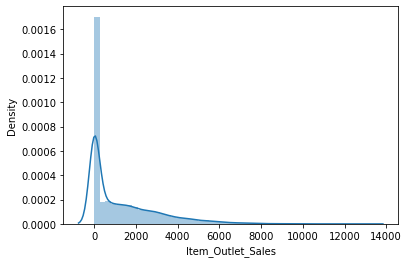

In [14]:
sns.distplot(data['Item_Outlet_Sales'])

Observations:

    1.Deviate from the normal distribution.
    2.Have appreciable positive skewness.
    3.Show peakedness.

In [15]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())

Skewness: 1.544684


Let us look at categorical and the numerical values.

In [16]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [18]:
categorial_features = data.select_dtypes(include=[np.object])
categorial_features.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train


In [19]:
numerical_features = data.select_dtypes(include=[np.number])
numerical_features.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228


In [20]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

finding missing values:

In [21]:
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,False,False,False,False,False,False,False,False,False,False,False,False,False
5677,False,False,False,False,False,False,False,False,False,False,False,False,False
5678,False,False,False,False,False,False,False,False,True,False,False,False,False
5679,False,False,False,False,False,False,False,False,True,False,False,False,False


In [22]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

Obervations:

    1.Item_Visibility has a min value of zero. This makes no practical sense because when a product is being sold in a store,       the visibility cannot be 0.

    2.Outlet_Establishment_Years vary from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert       them to how old the particular store is, it should have a better impact on sales.

    3.The lower ‘count’ of Item_Weight and Outlet_Size confirms the findings from the missing value check.

In [25]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

This tells us that there are 1559 products and 10 outlets/store. Another thing that should catch attention is that Item_Type has 16 unique values. Let’s explore further using the frequency of different categories in each nominal variable.

In [38]:
corr=numerical_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.019447
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.075008
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.075008,0.342781,-0.029489,1.000000


In [39]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.342781
Item_Weight                  0.019447
Outlet_Establishment_Year   -0.029489
Item_Visibility             -0.075008
Name: Item_Outlet_Sales, dtype: float64

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with our target variable. It is totally different from our initial hypotheses, this variables was expected to have high impact in the sales increase. Nevertheless, since this is not an expected behaviour and we should investigate.

<AxesSubplot:>

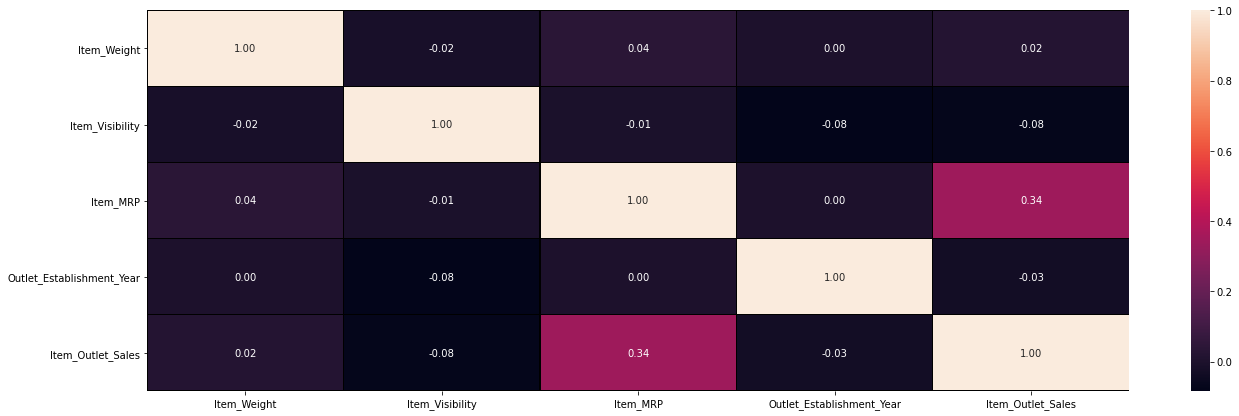

In [48]:
plt.figure(figsize=(22,7))
sns.heatmap(corr,annot=True,linewidths=0.1,linecolor='black',fmt="0.2f")

Light shades shows high positive correlation.

Dark shades shows high negative correlation.

# Data Visualization:

Univariate analysis:

<AxesSubplot:xlabel='Item_Identifier', ylabel='count'>

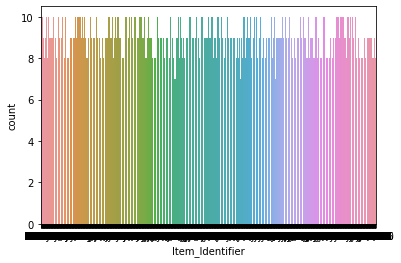

In [27]:
sns.countplot(data["Item_Identifier"])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

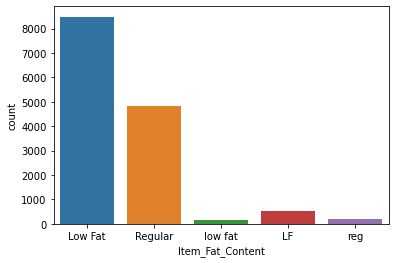

In [32]:
sns.countplot(data.Item_Fat_Content)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

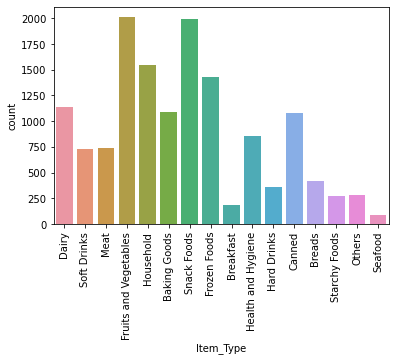

In [33]:
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

We have 16 different types of unique values and it is high number for categorical variable. 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

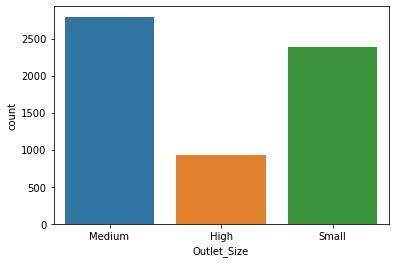

In [34]:
sns.countplot(train.Outlet_Size)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

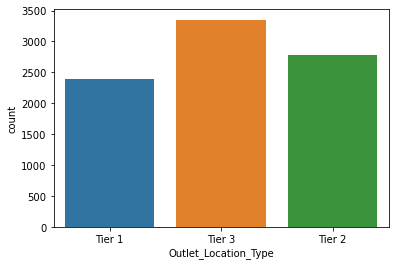

In [35]:
sns.countplot(train.Outlet_Location_Type)

From the above graph we can see that Bigmart is a brand of medium and small size city compare to densely populated area.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

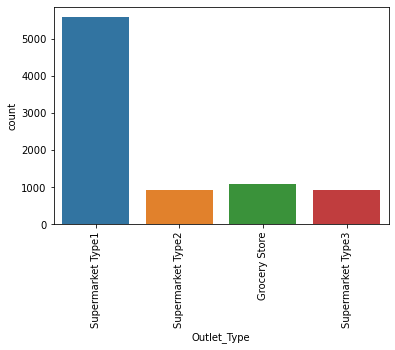

In [36]:
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)

There seems like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low numbers of stores, we can create a single category with all of three, but before doing this we must see their impact on target variable.

# Bivariate Analysis:

Numerical Variables:

# 1.Item_Weight and Item_Outlet_Sales

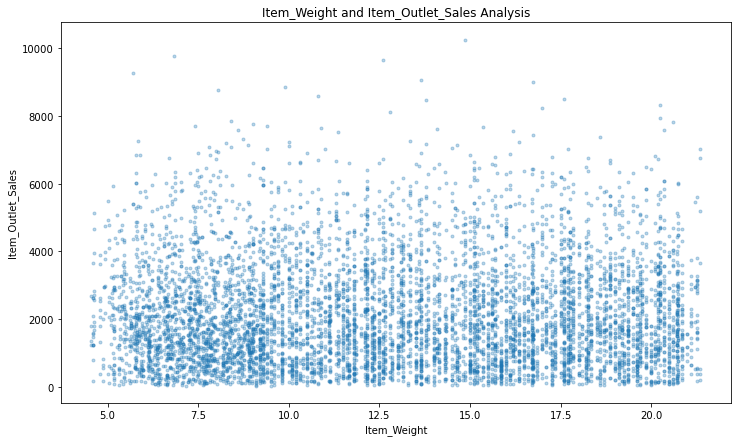

In [37]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

We saw previously that Item_Weight had a low correlation with our target variable. This plot shows there relation.

# Item_Visibility and Item_Outlet_Sales:

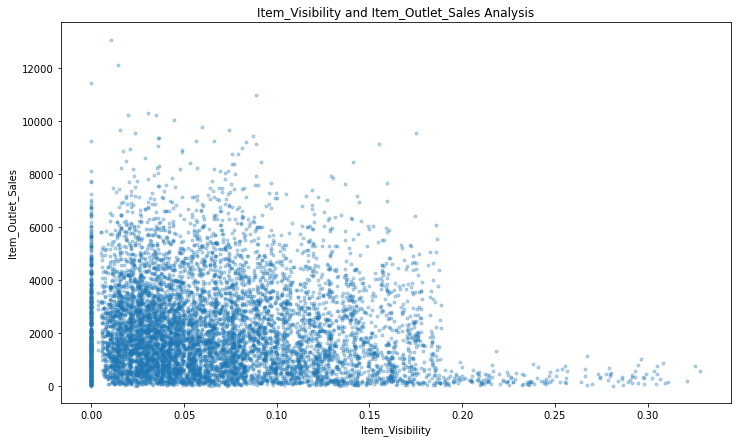

In [40]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

# Outlet_establishment_Year and Item_Outlet_Sales:

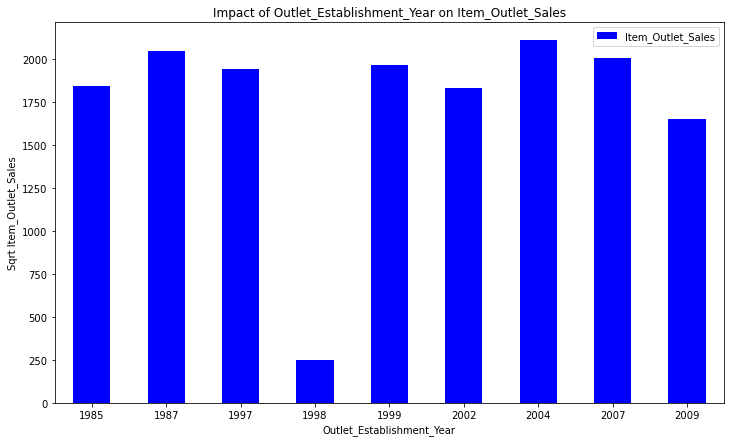

In [41]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There seems to be no appreciable meaning between the year of store establishment and the sales for the items.

Categorical Variables:

# Item_Fat_Content and Item_Outlet_Sales:

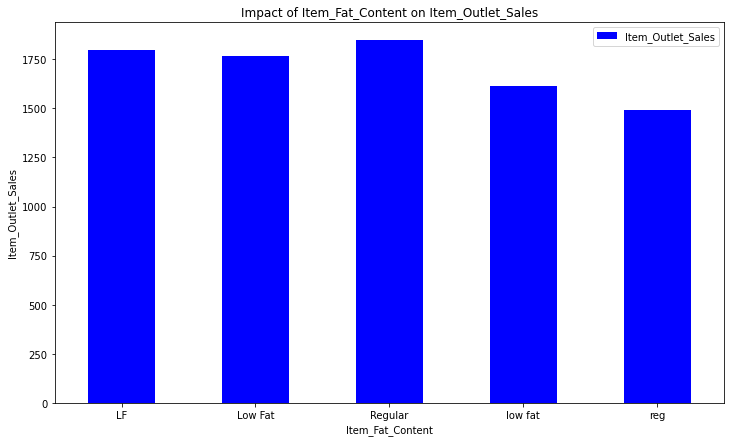

In [42]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Low Fat products seem to higher sales than the Regular products

# Outlet_Identifier and Item_Outlet_Sales

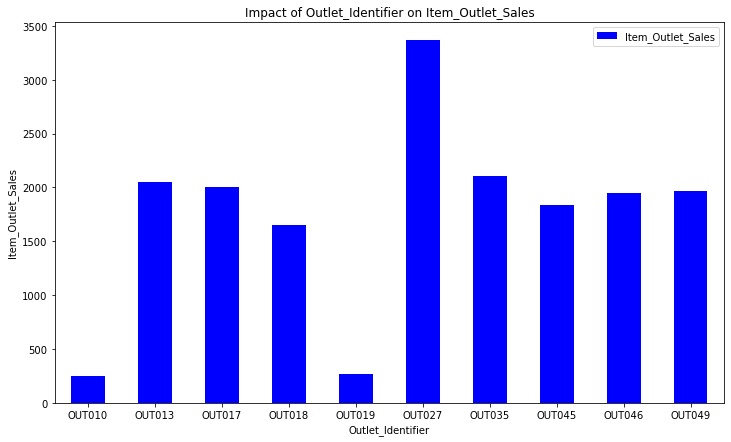

In [43]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))

plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Out of 10- There are 2 Groceries strore, 6 Supermarket Type1, 1Supermarket Type2, and 1 Supermarket Type3.

Multivariate analysis:

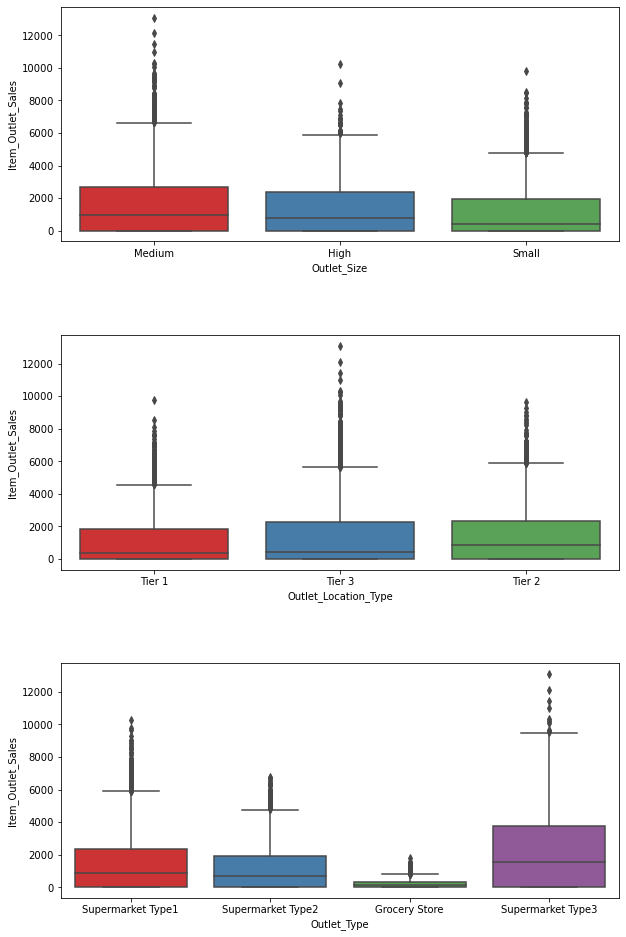

In [29]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()

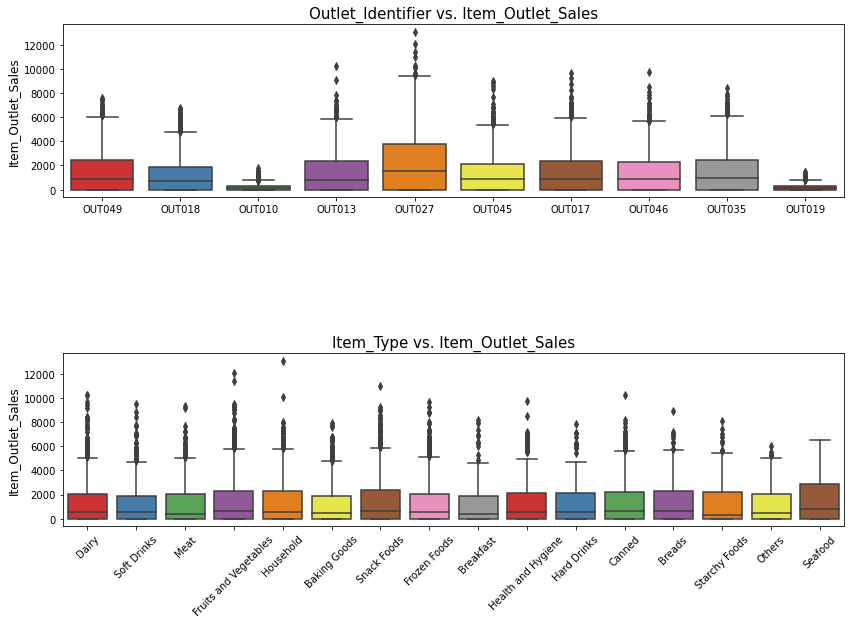

In [30]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

# Checking the distribution of continuous value of the object type column

In [45]:
data_visualization_continuous=data[["Outlet_Location_Type","Outlet_Type"]].copy()

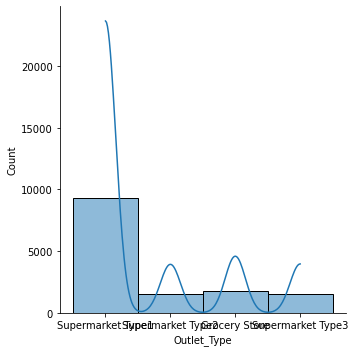

In [46]:
sns.displot(data_visualization_continuous['Outlet_Type'], kde=True)

Data is not normally distributed in this columns,because of viscous problem.

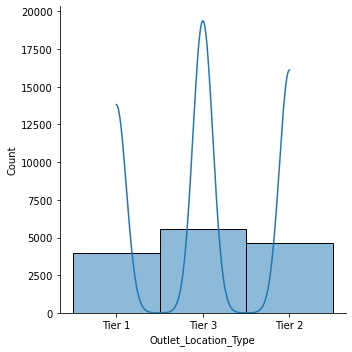

In [47]:
sns.displot(data_visualization_continuous['Outlet_Location_Type'], kde=True)

Data is not normally distributed in this columns beacause of viscous problem.

Filling the null values:

In [49]:
data['Item_Weight']=data['Item_Weight'].fillna((data['Item_Weight'].median())) 

In [53]:
data['Item_Weight'].isnull().sum()

0

We can see that Item_weight Nan values are filled using median().

# Plotting outliers:

In [59]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

<AxesSubplot:>

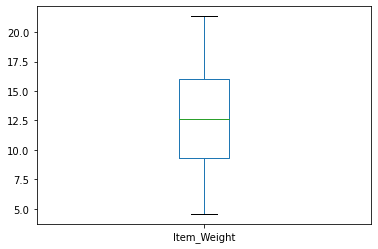

In [61]:
data['Item_Weight'].plot.box()

<AxesSubplot:>

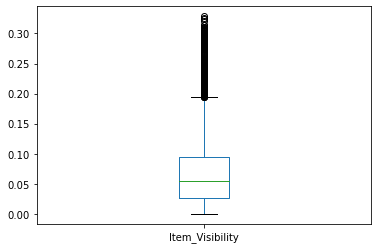

In [62]:
data['Item_Visibility'].plot.box()

Here we can see that there are so many outliers.

<AxesSubplot:>

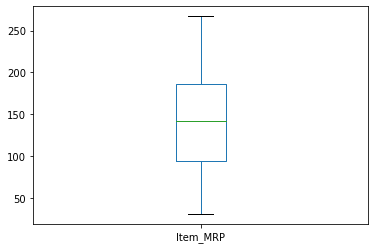

In [63]:
data['Item_MRP'].plot.box()

<AxesSubplot:>

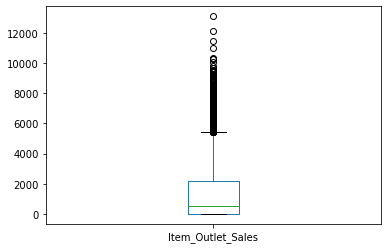

In [64]:
data['Item_Outlet_Sales'].plot.box()

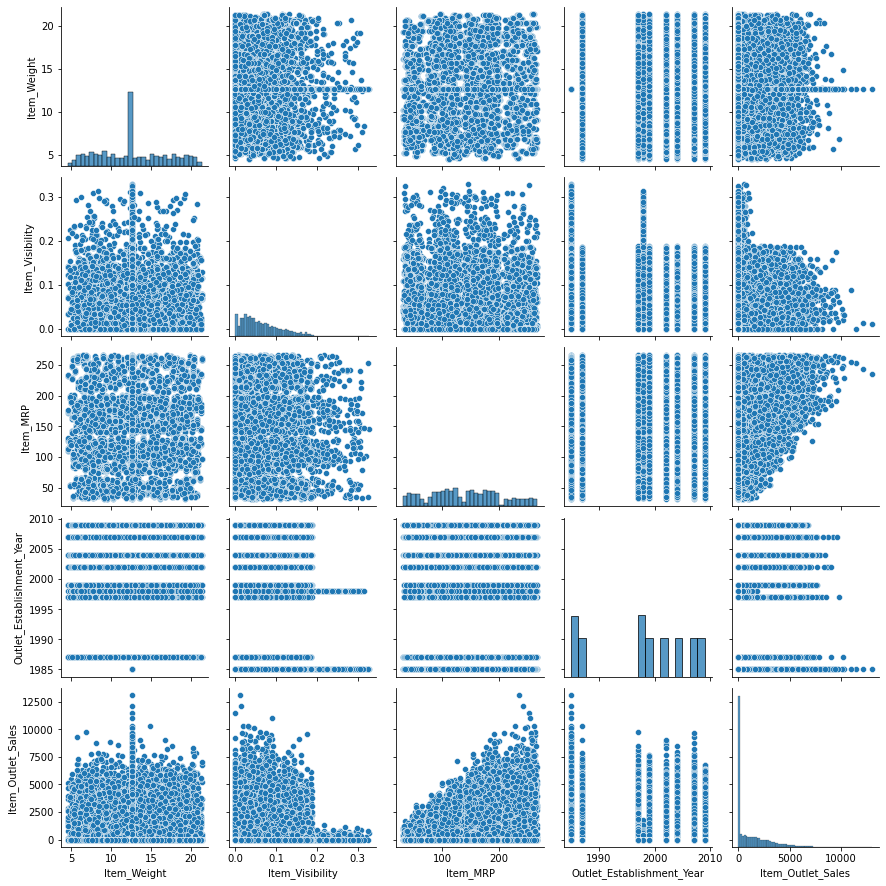

In [66]:
sns.pairplot(data)

# Removing Outliers:

In [76]:
#from scipy.stats import zscore  z=np.abs(zscore(df))

z=np.abs(zscore(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]))
z.shape

(14204, 5)

In [77]:
threshold=3
print(np.where(z>3))

(array([   43,    49,    83,   108,   130,   132,   145,   174,   203,
         240,   243,   275,   276,   304,   333,   337,   373,   402,
         424,   434,   456,   472,   497,   502,   521,   532,   640,
         641,   661,   694,   753,   809,   844,   854,   915,   935,
         991,   997,  1009,  1012,  1043,  1092,  1113,  1127,  1138,
        1159,  1254,  1272,  1291,  1311,  1324,  1393,  1434,  1450,
        1496,  1501,  1506,  1560,  1565,  1575,  1601,  1611,  1627,
        1644,  1650,  1651,  1658,  1700,  1705,  1709,  1710,  1805,
        1821,  1827,  1835,  1841,  1859,  1879,  1987,  1996,  1998,
        2088,  2109,  2122,  2216,  2238,  2251,  2282,  2293,  2324,
        2439,  2445,  2516,  2528,  2535,  2586,  2589,  2599,  2613,
        2615,  2680,  2687,  2728,  2776,  2803,  2855,  2895,  2922,
        3017,  3033,  3073,  3083,  3087,  3098,  3154,  3206,  3208,
        3213,  3234,  3255,  3286,  3399,  3400,  3407,  3458,  3474,
        3488,  3494

In [78]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(14204, 13)
(13828, 13)


# Loss Percent:

In [80]:
loss_percent=(14204-13828)/14204*100
loss_percent

2.647141650239369

We can see that our loss percent is 2.6 which is less than 10 so we can proceed further.

# Checking Skewness:

In [81]:
data.skew()

Item_Weight                  0.134711
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

In [82]:
data_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [90]:
data_new.drop('Item_Weight',axis=1,inplace=True)

In [91]:
data_new.drop('Outlet_Size',axis=1,inplace=True)

In [92]:
data_new

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,train
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Tier 1,Supermarket Type1,0.0000,test
5677,FDD47,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Tier 3,Supermarket Type2,0.0000,test
5678,NCO17,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Tier 2,Supermarket Type1,0.0000,test
5679,FDJ26,Regular,0.000000,Canned,214.6218,OUT017,2007,Tier 2,Supermarket Type1,0.0000,test


# Label Encoding:

In [96]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data_new.columns:
    data_new[column]=labelencoder.fit_transform(data_new[column])

In [98]:
x=data_new.iloc[:,-11:-2]
y=data_new.iloc[:,-2:-1]

      Item_Identifier  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0                 156                 1             1084          4      7455   
1                   8                 2             1415         14       627   
2                 662                 1             1158         10      3872   
3                1121                 2                0          6      5582   
4                1297                 1                0          9       842   
...               ...               ...              ...        ...       ...   
5676              233                 2              713         13      3856   
5677              308                 2            11649         15      5035   
5678             1426                 1             7891          8      3176   
5679              521                 2                0          3      6564   
5680              997                 2            10031          3      1513   

      Outlet_Identifier  Ou

# Removing Skewness:

In [99]:
from sklearn.preprocessing import power_transform
power_transform(x,method='yeo-johnson')

array([[-1.46127559, -0.52084585, -1.2302029 , ...,  0.16709764,
        -1.37524679, -0.13571488],
       [-2.09803837,  1.01385028, -1.08483388, ...,  1.39072712,
         1.09542622,  1.05693219],
       [-0.15387056, -0.52084585, -1.19611145, ...,  0.16709764,
        -1.37524679, -0.13571488],
       ...,
       [ 1.32402797, -0.52084585,  0.57826229, ...,  0.49863039,
        -0.12534587, -0.13571488],
       [-0.47275545,  1.01385028, -2.14546935, ...,  1.10728994,
        -0.12534587, -0.13571488],
       [ 0.53443117,  1.01385028,  0.95943953, ...,  0.49863039,
        -0.12534587, -0.13571488]])

# Normalising the data: 

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.38694718, -0.57269835, -1.2683248 , ...,  0.0569263 ,
        -1.36955049, -0.26068139],
       [-1.71569172,  0.98192921, -1.18241291, ...,  1.52759768,
         1.0995687 ,  1.02213082],
       [-0.26299624, -0.57269835, -1.24911791, ...,  0.0569263 ,
        -1.36955049, -0.26068139],
       ...,
       [ 1.43403639, -0.57269835,  0.49844933, ...,  0.42459414,
        -0.1349909 , -0.26068139],
       [-0.57619206,  0.98192921, -1.54967975, ...,  1.15992984,
        -0.1349909 , -0.26068139],
       [ 0.48112147,  0.98192921,  1.05389176, ...,  0.42459414,
        -0.1349909 , -0.26068139]])

In [104]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)

# 1.Decision Tree Regressor:

In [128]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [129]:
y_pred = dt.predict(x_test)

In [130]:
y_pred

array([   0.,  138., 2314., ...,  132.,    0.,    0.])

In [132]:
dt_accuracy = round(dt.score(x_train,y_train)*100,2)
dt_accuracy

100.0

# 2.Random Forest Regressor:

In [111]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [112]:
y_pred = regressor.predict(x_test)
y_pred

array([1136.54,  261.27,  942.11, ...,   71.06,  798.54,  755.01])

In [113]:
rf_accuracy = round(regressor.score(x_train,y_train)*100,2)
rf_accuracy

86.91

# Cross validation score:

In [146]:
print(cross_val_score(dt,x,y,cv=3).mean()*100)

-80.36117180154646


In [147]:
print(cross_val_score(regressor,x,y,cv=5).mean()*100)

-19.86304270317445


# Hyper parameter Tuning:

In [137]:
from sklearn.model_selection import GridSearchCV

In [138]:
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}

In [139]:
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

In [140]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [141]:
GCV.best_params_

{'criterion': 'friedman_mse', 'max_depth': 5}

# Evaluation of model:

In [143]:
Final_mod = DecisionTreeRegressor()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)

# Saving the model:

In [144]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

# Conclusion:

In [145]:
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[   0.  138. 2314. 1906. 2233. 1944.    0.    0. 1384.    0. 2576.    0.
 1461.  346.  454.  883.    0.    0.  378.    0.    0. 1145.    0.    0.
 2961. 2240.    0.  121.    0.  170.  585. 2297. 2604.    0.    0.    0.]
[[1694]
 [ 380]
 [1061]
 [   0]
 [   0]
 [ 839]
 [1097]
 [   0]
 [   0]
 [1544]
 [1449]
 [   0]
 [   0]
 [ 346]
 [   0]
 [ 724]
 [1055]
 [   0]
 [ 457]
 [ 582]
 [   0]
 [   0]
 [2287]
 [   0]
 [1495]
 [1660]
 [1242]
 [ 211]
 [1304]
 [ 265]
 [   0]
 [2478]
 [   0]
 [   0]
 [   0]
 [   0]]


The train and test data is balanced most regression methods hit the 100% accuracy with the dataset.